In [161]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

# SVM Regresion

Función de pérdida:
$$loss = \frac{1}{n}\sum_{i=1}^n\max(0,|y_i-(Ax_i+b)|-\varepsilon)$$

In [162]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

x_vals = np.array(x_vals, dtype='float32')
y_vals = np.array(y_vals, dtype='float32')

#Valores de los hiperparametros
batch_size = 50
learning_rate=0.05

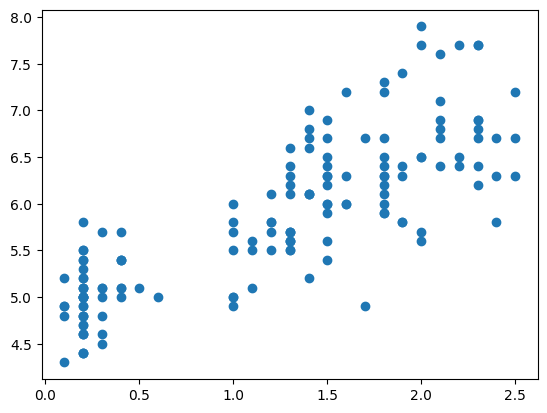

In [163]:
plt.plot(x_vals, y_vals, 'o')
plt.show()

In [164]:
#creacion de datos de train y test
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [165]:
# Definir variables y modelo
class Model(tf.Module):
    def __init__(self):
        self.A = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='A')
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='b')
    
    def __call__(self, x2_data):
        return tf.add(tf.matmul(x2_data, self.A), self.b)

model = Model()

In [166]:
# Definir la pérdida y el optimizador

loss_=[]
accuracy_=[]
def loss_fn(model, x2_data, y_target):

    epsilon = tf.constant([0.5])
    loss = tf.reduce_mean(tf.maximum(0.0, tf.subtract(tf.abs(tf.subtract(model(x2_data), y_target)), epsilon)))
    prediction = tf.sign(model(x2_data))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
    loss_.append(loss)
    accuracy_.append(accuracy)

    return tf.reduce_mean(loss)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [167]:
#Funcion de entrenamiento
def train_step(model, x2_data, y_target):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x2_data, y_target)
    gradients = tape.gradient(loss, [model.A, model.b])
    optimizer.apply_gradients(zip(gradients, [model.A, model.b]))

In [168]:
#Entrenamiento
for i in range(400):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    train_step(model, rand_x, rand_y)
    if (i + 1) % 100 == 0:
        print('Paso #' + str(i + 1) + ", A=" + str(model.A.numpy()[0][0]) + ", b=" + str(model.b.numpy()[0][0]))

Paso #100, A=2.211938, b=2.7874231
Paso #200, A=1.4528377, b=3.9924245
Paso #300, A=1.1087378, b=4.4884253
Paso #400, A=0.96323824, b=4.6974277


In [169]:
#Pasa el error de arreglo de tensorflow a un arregle
loss_list = np.array(loss_)
accuracy_list = np.array(accuracy_)

In [170]:
#construccion de los datos para el grafico
slope = model.A[0][0].numpy()
y_intercept = model.b[0][0]
width = 0.5

best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

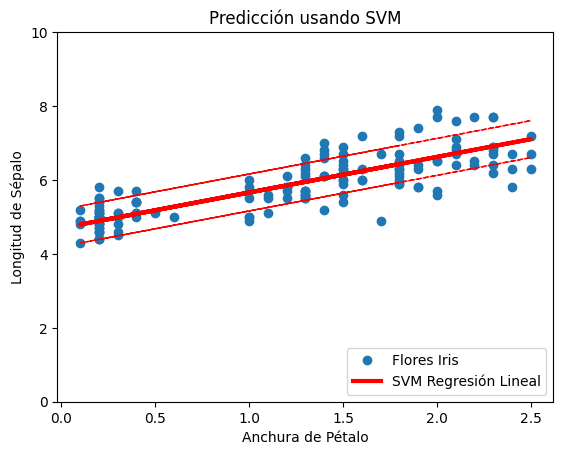

In [171]:
plt.plot(x_vals, y_vals, 'o', label = "Flores Iris")
plt.plot(x_vals, best_fit, 'r-', label = "SVM Regresión Lineal", linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=1)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=1)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Predicción usando SVM")
plt.show()

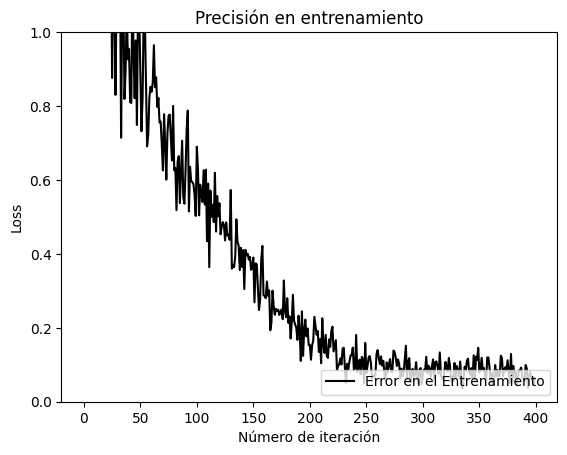

In [172]:
#Medida de la precision del modelo
plt.plot(loss_list, 'k-', label = "Error en el Entrenamiento")
plt.title("Precisión en entrenamiento")
plt.xlabel("Número de iteración")
plt.ylabel("Loss")
plt.legend(loc="lower right")
plt.ylim([0,1])
plt.show()